# Assignment for Data QA & QC Internship @ Datahut

## Problem Statement
The dataset contains employee information, but it is messy and contains several inconsistencies and errors. The objective is to clean and preprocess this dataset to ensure data quality and consistency.

## Objective
1. Load and inspect the dataset to understand its structure and identify errors and inconsistencies.
2. Handle missing values appropriately without losing significant data.
3. Remove duplicate records to ensure uniqueness.
4. Validate and correct email formats, ensuring only professional emails are retained.
5. Clean and standardize name fields, date formats, and department names.
6. Handle noise in the salary column, ensuring values are within a reasonable range.

## Expected Outcome
A cleaned and well-structured dataset that is ready for further analysis or use in downstream applications, with:
* Consistent and validated email addresses.
* Standardized names, dates, and department names.
* Handled missing values and reduced data loss.
* Filtered and reasonable salary values.


In [70]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load the Data

In [71]:
df = pd.read_csv(r"C:\Users\HP\Desktop\DSML Internship\Data Hut\Final\messy_data.csv")
df.head()

,Unnamed: 0,ID,Name,Age,Email,Join Date,Salary,Department
0,0,1e407ff9-6255-489d-a0de-34135d4f74bd,Hunter Thomas,25.0,xlopez@hotmail.com,NaN,88552.0,Sales
1,1,379f55b8-87d5-4739-a146-7400b78c24d1,Jeremy Irwin,90.0,Jillian Jenkins,2022-07-07,139227.0,NaN
2,2,18261368-dfa1-47f0-afc6-bddf45926b07,Jennifer Hammondquickly,66.0,jscottgreen.biz,2023-11-21,65550.0,Engineering
3,3,ae7cf7cf-17cf-4c8b-9c44-4f61a9a238e5,Sydney Taylorso,39.0,luke56gonzalez.com,2021-11-05,139932.0,SupportJ
4,4,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,Julia Lee,71.0,figueroakayla@yahoo.com,NaN,143456.0,Marketing


In [72]:
df.tail()

,Unnamed: 0,ID,Name,Age,Email,Join Date,Salary,Department
10995,6523,07c223be-03e6-4f70-a2b5-86df778cc61a,NaN,NaN,NaN,NaN,NaN,NaN
10996,9785,da8a6bbc-5026-4630-848d-f64e80dac56c,Steven Armstrong,38.0,molly89gmail.com,2021-06-24,NaN,Sales
10997,7826,ed19c966-d6d8-4047-b410-b6e595a39340,Stephanie Riossell,NaN,robert96@pollard-frye.com,15/08/2006,122609.594149,HR
10998,7648,783b36b4-d09f-46c9-8a52-7ff96b80863e,Bonnie Benitez,37.0,roypark@warren.net,2020-10-09,147322.005171,Support
10999,7107,fc25a38a-5747-46eb-b6d3-7173f8255809,Caroline Ochoa,53.0,cdavis@hodges.com,2023-08-10,149224.000000,Support


## 2. Inspect the Data

In [73]:
df.shape

(11000, 8)

There are 11000 rows and 8 columns

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  11000 non-null  int64  
 1   ID          11000 non-null  object 
 2   Name        8667 non-null   object 
 3   Age         9253 non-null   float64
 4   Email       9731 non-null   object 
 5   Join Date   8808 non-null   object 
 6   Salary      8761 non-null   float64
 7   Department  8745 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 687.6+ KB


In [75]:
df.describe()

,Unnamed: 0,Age,Salary
count,11000.000000,9253.000000,8761.000000
mean,5012.947818,54.162650,89886.585012
std,2884.739158,21.072919,34896.320117
min,0.000000,18.000000,24655.136613
25%,2509.750000,36.000000,59723.844874
50%,5024.500000,54.000000,89241.000000
75%,7510.250000,72.000000,119491.000000
max,9999.000000,90.000000,176156.206747


In [76]:
df.describe(include = 'object').transpose()

,count,unique,top,freq
ID,11000,10000,0413800c-975f-4107-908c-f9f733496b3c,2
Name,8667,7929,Elizabeth Williams,6
Email,9731,9160,fwilliams@yahoo.com,3
Join Date,8808,3338,2022-03-31,12
Department,8745,264,Support,1425


* Out of 11,000 records, 10,000 unique IDs suggest potential duplicates.
* There are 7,929 unique names, with Elizabeth Williams being the most frequent.
* Among 3,338 unique join dates, the top date is 2022-03-31, appearing 12 times.

In [77]:
df.duplicated().sum()

291

There are 291 duplicate rows

## 3. Handle Missing Values

In [78]:
# Let's check rows with more than 5 null values
rows_with_many_nulls = df[df.isnull().sum(axis=1) > 5]

print("Rows with more than 5 null values:")
rows_with_many_nulls.head()

Rows with more than 5 null values:


,Unnamed: 0,ID,Name,Age,Email,Join Date,Salary,Department
18,18,05e36d3f-6422-4329-80b2-1fd3543ee254,NaN,NaN,NaN,NaN,NaN,NaN
19,19,a8b6e8e3-f2f2-42c6-b2d7-2bbfd9b91125,NaN,NaN,NaN,NaN,NaN,NaN
24,24,3f741e1f-f781-463e-a12a-871d3866c711,NaN,NaN,NaN,NaN,NaN,NaN
30,30,754d31ea-7749-4d29-b0f1-a8fb908d541c,NaN,NaN,NaN,NaN,NaN,NaN
40,40,9aa93a07-4dac-4c44-bdde-0424c118041f,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
# remove those rows
df = df.dropna(thresh=len(df.columns) - 5)

In [80]:
df.isnull().sum()

Unnamed: 0       0
ID               0
Name          1064
Age            478
Email            0
Join Date      923
Salary         970
Department     986
dtype: int64

In [81]:
# Fill missing values with appropriate measures
df['Name'] = df['Name'].fillna('Unknown')
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Salary'] = df['Salary'].fillna(df['Salary'].median())
df['Department'] = df['Department'].fillna('Unknown')

In [82]:
# Forward fill to fill most of the missing 'Join Date' values
df['Join Date'].ffill(inplace=True)

# Backward fill to handle any remaining null values
df['Join Date'].bfill(inplace=True)

In [83]:
df.isnull().sum()

Unnamed: 0    0
ID            0
Name          0
Age           0
Email         0
Join Date     0
Salary        0
Department    0
dtype: int64

## 4. Remove Duplicates

In [84]:
# Remove duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

We have already found there are duplicate ID values, lets explore further

In [85]:
# Identify duplicate IDs
duplicate_ids = df[df.duplicated('ID', keep=False)]

# Sort the DataFrame by the ID column to group duplicates together
sorted_duplicates = duplicate_ids.sort_values(by='ID')

# Print the sorted rows with duplicate IDs
sorted_duplicates.head(8)

,Unnamed: 0,ID,Name,Age,Email,Join Date,Salary,Department
10664,1009,0053781e-61aa-423e-ae39-adc1ee24f24c,Ronald Morganlikely,43.0,chelsea56@richardson.com,2022-01-02,140100.000000,MarketingD
1009,1009,0053781e-61aa-423e-ae39-adc1ee24f24c,Ronald Morgan,43.0,chelsea56richardson.com,23/02/2020,140100.000000,Marketing
10065,7942,00ac2b1c-dcc9-4e5f-a72a-b5c5e0fe092e,Tammy Thomas,83.0,vaughnmatthew@moyer-walton.com,2020-03-17,63500.000000,Marketing
7942,7942,00ac2b1c-dcc9-4e5f-a72a-b5c5e0fe092e,Tammy Thomasbudget,83.0,vaughnmatthew@moyer-walton.com,13/08/1991,63500.000000,Marketing
9851,9851,00d23202-87b8-49bf-bec4-deea25ca43f4,Kelsey Gutierrezsummer,41.0,lucerohaleyrollins.com,2022-12-03,36948.174044,HR
10094,9851,00d23202-87b8-49bf-bec4-deea25ca43f4,Kelsey Gutierrezwind,41.0,lucerohaley@rollins.com,2022-08-19,44371.000000,HRT
7110,7110,011cf560-4320-4c27-8cb4-4588e1924879,Unknown,46.0,devin27@wright.info,2024-05-19,40296.000000,HRZ
10760,7110,011cf560-4320-4c27-8cb4-4588e1924879,Unknown,46.0,devin27@wright.info,2024-05-19,40296.000000,HRC


lets correct the date format first

## 5. Standardise Date Formats

In [86]:
# Convert 'Join Date' to datetime format
df['Join Date'] = pd.to_datetime(df['Join Date'], errors='coerce')

# Convert datetime format to YYYY-MM-DD string format
df['Join Date'] = df['Join Date'].dt.strftime('%Y-%m-%d')

print("DataFrame after standardizing 'Join Date' format:")
df.head()

DataFrame after standardizing 'Join Date' format:


,Unnamed: 0,ID,Name,Age,Email,Join Date,Salary,Department
0,0,1e407ff9-6255-489d-a0de-34135d4f74bd,Hunter Thomas,25.0,xlopez@hotmail.com,2022-07-07,88552.0,Sales
1,1,379f55b8-87d5-4739-a146-7400b78c24d1,Jeremy Irwin,90.0,Jillian Jenkins,2022-07-07,139227.0,Unknown
2,2,18261368-dfa1-47f0-afc6-bddf45926b07,Jennifer Hammondquickly,66.0,jscottgreen.biz,2023-11-21,65550.0,Engineering
3,3,ae7cf7cf-17cf-4c8b-9c44-4f61a9a238e5,Sydney Taylorso,39.0,luke56gonzalez.com,2021-11-05,139932.0,SupportJ
4,4,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,Julia Lee,71.0,figueroakayla@yahoo.com,2021-11-05,143456.0,Marketing


In [87]:
df['Join Date'].isna().sum()

0

Let's deal with the rows with duplicate ID

In [88]:
import re

def is_valid_email(email):
    pattern = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
    return bool(re.match(pattern, email))

# Function to merge duplicate rows based on specified criteria
def merge_duplicates(group):
    # Sort group by Join Date to prioritize latest data
    group_sorted = group.sort_values(by='Join Date', ascending=False)

    # Start with the latest sorted row
    merged = group_sorted.iloc[0].copy()

    # Iterate through the sorted group to fill missing values and correct information
    for _, row in group_sorted.iterrows():
        # Name: Keep the name with the least number of characters and non-null values
        if pd.notnull(row['Name']) and (pd.isnull(merged['Name']) or len(row['Name']) < len(merged['Name'])):
            merged['Name'] = row['Name']

        # Email: Keep the email with the correct format and non-null values
        if pd.isnull(merged['Email']) or (pd.notnull(row['Email']) and is_valid_email(row['Email'])):
            merged['Email'] = row['Email']

        # Join Date: Always keep the latest join date and non-null values
        merged['Join Date'] = row['Join Date']

        # Department: Keep the department with the least number of characters and non-null values
        if pd.isnull(merged['Department']) or (pd.notnull(row['Department']) and len(row['Department']) < len(merged['Department'])):
            merged['Department'] = row['Department']

        # Salary: Update the salary corresponding to the latest join date and non-null values
        merged['Salary'] = row['Salary']

    return merged

In [89]:
# Find duplicate IDs
duplicate_ids = df[df.duplicated(subset='ID', keep=False)]['ID'].unique()

# List to store cleaned rows
cleaned_rows = []

# Group by 'ID' and apply merge_duplicates only on rows with duplicate IDs
for _, group in df.groupby('ID'):
    if group['ID'].iloc[0] in duplicate_ids:
        cleaned_row = merge_duplicates(group)
        cleaned_rows.append(cleaned_row)
    else:
        cleaned_rows.extend(group.to_dict('records'))  # Add non-duplicate rows as they are

# Create a new DataFrame with cleaned rows
cleaned_df = pd.DataFrame(cleaned_rows)

# Update original df to include cleaned rows
df = cleaned_df

df

,Unnamed: 0,ID,Name,Age,Email,Join Date,Salary,Department
0,4626,0008fab3-6dd9-4c36-8ea1-183d8dbd9228,Kevin Stone,61.0,nancyortega@gmail.com,2021-10-19,139842.0,Engineering
1,2421,000e34f7-8b09-469d-bb06-dc80c99ff254,Steven Morales,88.0,richard72hotmail.com,2003-02-15,68845.0,Marketing
2,1355,000ea181-5552-4a36-b151-1d57483b5a31,Natalie Chapman,27.0,aliciawright@yahoo.com,2021-05-22,56616.0,Support
3,8242,000ebe72-241a-4c74-9bd5-f0b1c0195760,Felicia Simmons,74.0,mlewis@hotmail.com,1983-06-09,62610.0,HR
4,3419,002a244f-c467-4bec-9ab9-0eea2d1e3626,Travis Garciablack,84.0,gmedina@wilson-scott.com,2020-02-17,49203.0,HR
...,...,...,...,...,...,...,...,...
8903,6346,ffe82360-c2a2-4e75-a553-00987100992e,Makayla Andersenteam,54.0,leon97hotmail.com,2023-05-16,31626.0,Engineering
8904,6045,ffec6404-7edf-463d-8a61-909b38e9c185,Gina Browndown,86.0,joseph11@williams.com,2024-03-01,51202.0,Sales
8905,1784,fff55723-981a-4646-b95c-1f33543e97d6,Jessica White,48.0,hpope@gmail.com,2021-02-16,89241.0,Marketing
8906,8705,fff59b6d-2e25-40a4-969d-c808e268b180,Unknown,48.0,michael30@crane.com,1996-09-05,100996.0,Unknown


In [90]:
df[df.duplicated('ID', keep=False)]

,Unnamed: 0,ID,Name,Age,Email,Join Date,Salary,Department


Now there are no rows with duplicate ID

## 6. Correct Email Formats

In [91]:
def is_valid_email(email):
    pattern = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
    return re.match(pattern, email)

df['Email'] = df['Email'].apply(lambda x: x if is_valid_email(x) else 'invalid@example.com')

## 7. Clean Name Fields

In [92]:
df['Name'].iloc[30:40]

30      Sandra Rivera DDSthing
31             Catherine Cowan
32              Amber Delacruz
33                Joshua Allen
34      Christine Cummingstime
35    Victoria Perrypopulation
36              Melissa Castro
37                     Unknown
38               Michael Riley
39                 Richard Lee
Name: Name, dtype: object

In [93]:
# Function to clean names
def clean_name(name):
    # Remove uppercase letters at the end
    while name and name[-1].isupper():
        name = name[:-1]
    
    # Remove trailing spaces
    name = name.strip()
    
    # Split the cleaned name into words
    words = name.split()
    
    # If there are more than two words, remove the last word and return
    if len(words) > 2:
        cleaned_name = ' '.join(words[:-1])
        return cleaned_name.strip()
    
    # If exactly two words, check if the second word is longer than 8 characters
    if len(words) == 2 and len(words[1]) > 8:
        cleaned_name = words[0]
    else:
        cleaned_name = name
    
    return cleaned_name.strip()

In [94]:
# Clean the 'Name' column
df['Name'] = df['Name'].apply(clean_name)

In [95]:
df['Name'].iloc[45:60]

45          Sheila Lee
46       Barbara Heath
47         Shane Lyons
48       Alicia Watson
49    Marcus Fernandez
50          Gina Adams
51       Ronald Murphy
52           Jose Lynn
53             Valerie
54          Emma Clark
55         Terry Wells
56        Michael Dyer
57     Meredith Nguyen
58            Mitchell
59     Donald Williams
Name: Name, dtype: object

## 8.Correct Department Names

In [96]:
df["Department"].unique()

array(['Engineering', 'Marketing', 'Support', 'HR', 'Unknown', 'SalesE',
       'HRp', 'SupportY', 'Sales', 'SupportQ', 'HRr', 'HRZ',
       'EngineeringS', 'SupportS', 'HRl', 'HRf', 'Salesz', 'Engineeringl',
       'SupportA', 'Supportl', 'Engineeringm', 'SupportX', 'MarketingN',
       'EngineeringT', 'Engineeringn', 'Supportk', 'SalesJ',
       'Engineeringq', 'EngineeringB', 'MarketingE', 'MarketingO',
       'Supporty', 'MarketingV', 'HRB', 'EngineeringR', 'MarketingX',
       'HRJ', 'Supportu', 'SupportD', 'EngineeringF', 'Engineeringt',
       'Marketingr', 'EngineeringU', 'HRk', 'SalesO', 'HRm', 'Supportd',
       'SalesB', 'Supportw', 'EngineeringD', 'HRy', 'Supportf',
       'EngineeringP', 'Supportc', 'MarketingS', 'SupportB', 'Supportg',
       'HRv', 'HRa', 'SalesZ', 'Engineeringa', 'SupportH', 'EngineeringM',
       'EngineeringE', 'Engineeringb', 'MarketingK', 'Salesq', 'SalesR',
       'SalesY', 'Supportm', 'Salesw', 'Salesm', 'HRE', 'Marketingq',
       'MarketingC', '

In [97]:
# Common department values to keep
common_departments = ['Unknown', 'Marketing', 'Support', 'Sales', 'Engineering', 'HR']

# Function to clean department names
def clean_department(department):
    for common_dept in common_departments:
        if department.startswith(common_dept):
            return common_dept
    return department  # Return original if not found in common departments

In [98]:
# Clean the 'Department' column
df['Department'] = df['Department'].apply(clean_department)

In [99]:
df["Department"].unique()

array(['Engineering', 'Marketing', 'Support', 'HR', 'Unknown', 'Sales'],
      dtype=object)

## 9. Handle Salary Noise

In [100]:
df['Salary']

0       139842.0
1        68845.0
2        56616.0
3        62610.0
4        49203.0
          ...   
8903     31626.0
8904     51202.0
8905     89241.0
8906    100996.0
8907     58630.0
Name: Salary, Length: 8908, dtype: float64

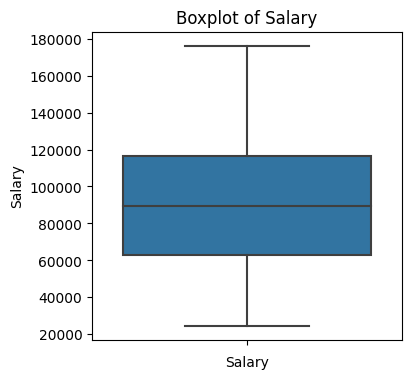

In [101]:
plt.figure(figsize=(4, 4))
sns.boxplot(y=df['Salary'])
plt.title('Boxplot of Salary')
plt.xlabel('Salary')
plt.show()

There are no outliers visible

In [102]:
# Summary statistics
df['Salary'].describe()

count      8908.000000
mean      89823.885961
std       33088.510990
min       24655.136613
25%       63123.250000
50%       89241.000000
75%      116237.270695
max      176156.206747
Name: Salary, dtype: float64

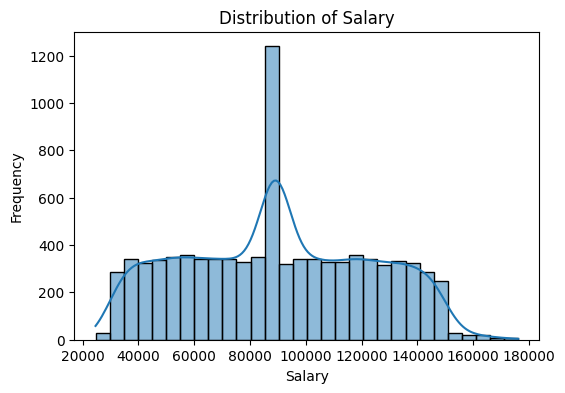

In [103]:
# Histogram to visualize distribution
plt.figure(figsize=(6, 4))
sns.histplot(data=df['Salary'], kde=True)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

In [104]:
# Round Salary Values to the nearest integer and remove decimal points
df['Salary'] = df['Salary'].round(0).astype(int)

In [105]:
df.head()

,Unnamed: 0,ID,Name,Age,Email,Join Date,Salary,Department
0,4626,0008fab3-6dd9-4c36-8ea1-183d8dbd9228,Kevin Stone,61.0,nancyortega@gmail.com,2021-10-19,139842,Engineering
1,2421,000e34f7-8b09-469d-bb06-dc80c99ff254,Steven Morales,88.0,invalid@example.com,2003-02-15,68845,Marketing
2,1355,000ea181-5552-4a36-b151-1d57483b5a31,Natalie Chapman,27.0,aliciawright@yahoo.com,2021-05-22,56616,Support
3,8242,000ebe72-241a-4c74-9bd5-f0b1c0195760,Felicia Simmons,74.0,mlewis@hotmail.com,1983-06-09,62610,HR
4,3419,002a244f-c467-4bec-9ab9-0eea2d1e3626,Travis,84.0,gmedina@wilson-scott.com,2020-02-17,49203,HR


In [106]:
# Lets sort the DataFrame by 'Unnamed: 0' column
df_sorted = df.sort_values(by='Unnamed: 0').reset_index(drop=True)

In [107]:
df_sorted

,Unnamed: 0,ID,Name,Age,Email,Join Date,Salary,Department
0,0,1e407ff9-6255-489d-a0de-34135d4f74bd,Hunter Thomas,25.0,xlopez@hotmail.com,2022-07-07,88552,Sales
1,1,379f55b8-87d5-4739-a146-7400b78c24d1,Jeremy Irwin,90.0,invalid@example.com,2022-07-07,139227,Unknown
2,2,18261368-dfa1-47f0-afc6-bddf45926b07,Jennifer,66.0,invalid@example.com,2023-11-21,65550,Engineering
3,3,ae7cf7cf-17cf-4c8b-9c44-4f61a9a238e5,Sydney Taylorso,39.0,invalid@example.com,2021-11-05,139932,Support
4,4,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,Julia Lee,71.0,figueroakayla@yahoo.com,2021-11-05,143456,Marketing
...,...,...,...,...,...,...,...,...
8903,9995,610210a0-e344-4b79-95ce-ff6583d7d8ce,David,70.0,jeremybanks@rogers.biz,2020-12-17,88472,Support
8904,9996,eb66531c-901a-4da7-bc60-a4951886b5a8,Karen Yoder,59.0,smithdaniel@williams-thompson.net,2023-12-12,71575,Unknown
8905,9997,86a83f25-224d-498d-9901-c2e4a49ffbd2,Anthony,57.0,nfranklin@yahoo.com,1979-05-12,128456,Marketing
8906,9998,9cbba425-6af2-455f-8566-62402de79661,Nicole Moore,82.0,lmyers@gmail.com,2020-10-28,128939,Engineering


In [110]:
# Save the DataFrame to a CSV file
df_sorted.to_csv('cleaned_dataset.csv', index=False)